In [351]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [352]:
#read file
df=pd.read_csv('Dataset.csv')
df.shape

(545, 13)

In [353]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [354]:
#Coverting Categorical columns to numerical columns
df.replace({'yes':1,'no':0},inplace=True)
df.head()

C:\Users\nishi\AppData\Local\Temp\ipykernel_20100\4202607258.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes':1,'no':0},inplace=True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [355]:
#converting furnishingstatus column
df['furnishingstatus'].unique()
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [356]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [357]:
#Scaling the data
scaler=StandardScaler()
df[['area','bedrooms','bathrooms','stories','parking']]=scaler.fit_transform(df[['area','bedrooms','bathrooms','stories','parking']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,2
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,2
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,2
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,2


In [358]:
#log transformation of target variable
df['price']=np.log1p(df['price'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,2
1,16.321037,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,2
2,16.321037,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,16.318175,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,2
4,16.250001,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,2


In [359]:
#removing outliers
q1=df.price.quantile(0.25)
q3=df.price.quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df.price>=lower_bound) & (df.price<=upper_bound)]
df.shape

(544, 13)

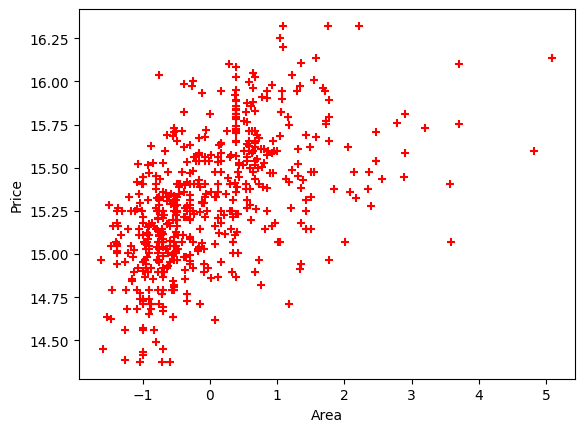

In [360]:
#Visualizing the data:area vs price
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='red',marker='+')


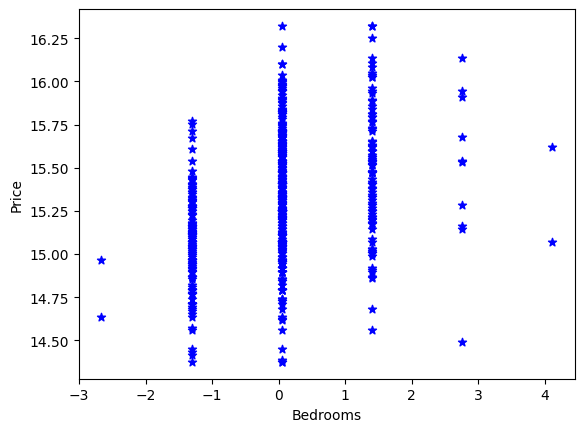

In [361]:
#visualizing the data:bedrooms vs price
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.scatter(df.bedrooms,df.price,color='blue',marker='*')


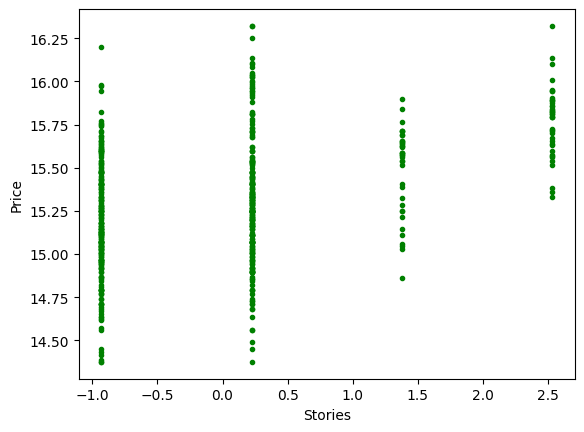

In [362]:
#visualizing the data:stories vs price
plt.xlabel('Stories')
plt.ylabel('Price')
plt.scatter(df.stories,df.price,color='green',marker='.' )

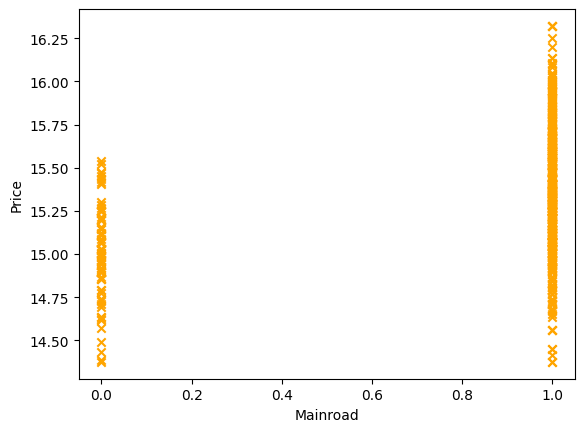

In [363]:
#visualizing the data:mainroad vs price
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.scatter(df.mainroad,df.price,color='orange',marker='x' )

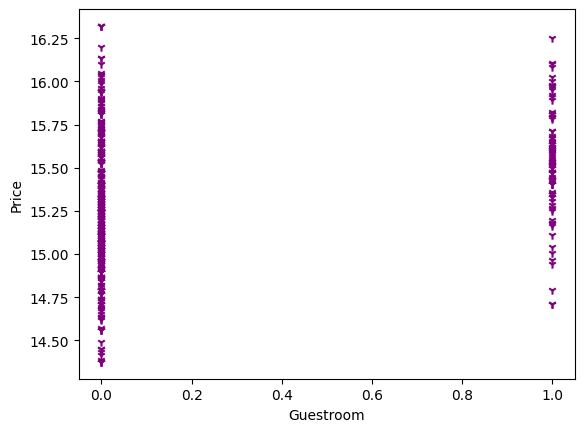

In [364]:
#visualizing the data:guestroom vs price
plt.xlabel('Guestroom')
plt.ylabel('Price')
plt.scatter(df.guestroom,df.price,color='purple',marker='1' )


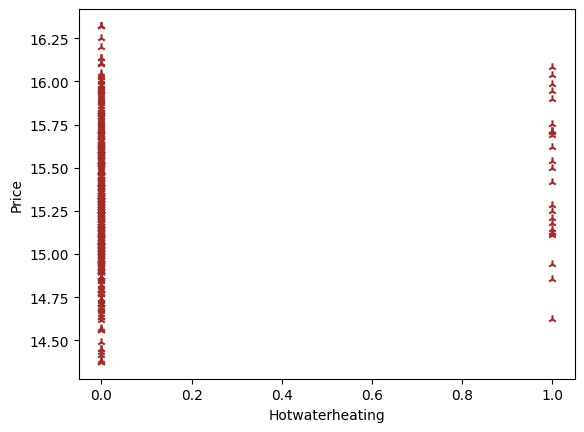

In [365]:
#visualizing the data:hotwaterheating vs price
plt.xlabel('Hotwaterheating')
plt.ylabel('Price')
plt.scatter(df.hotwaterheating,df.price,color='brown',marker='2' )


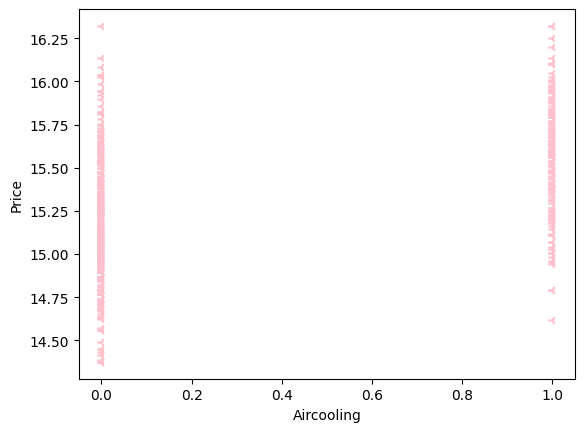

In [366]:
#visualizing the data:aircooling vs price
plt.xlabel('Aircooling')
plt.ylabel('Price')
plt.scatter(df.airconditioning,df.price,color='pink',marker='3' )

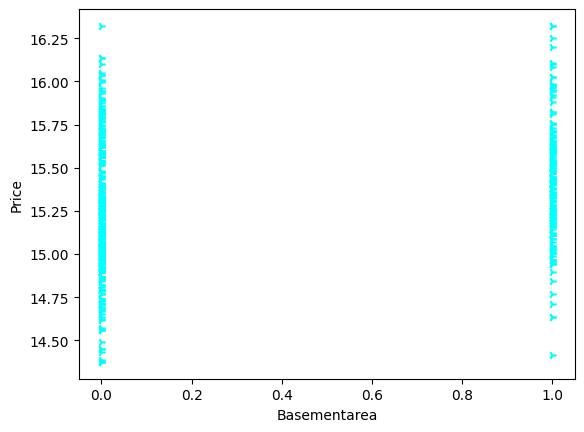

In [367]:
#visualizing the data:basementarea vs price
plt.xlabel('Basementarea')
plt.ylabel('Price')
plt.scatter(df.basement,df.price,color='cyan',marker='4' )

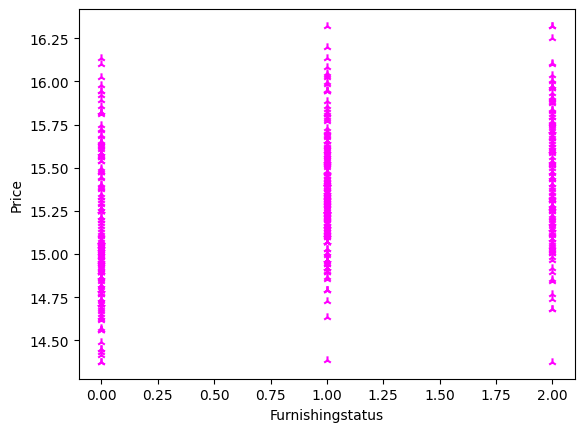

In [368]:
#visualizing the data:furnishingstatus vs price
plt.xlabel('Furnishingstatus')
plt.ylabel('Price')
plt.scatter(df.furnishingstatus,df.price,color='magenta',marker='2' )

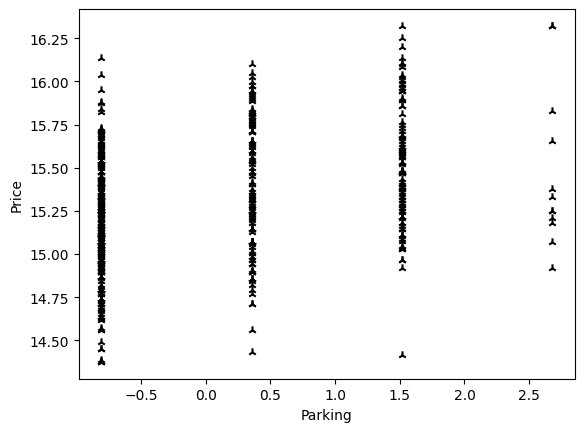

In [369]:
#Visualizing the data:parking vs price
plt.xlabel('Parking')
plt.ylabel('Price')
plt.scatter(df.parking,df.price,color='black',marker='2' )

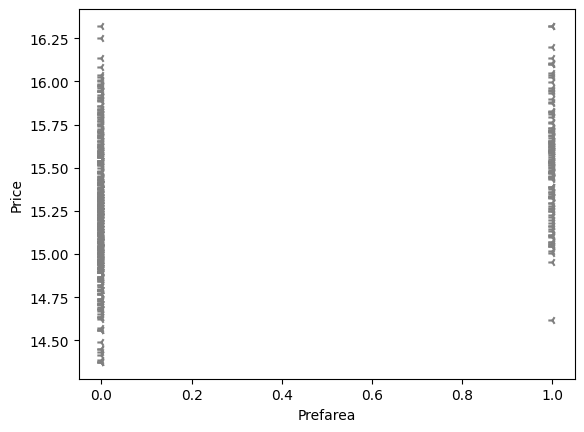

In [370]:
#visualizing the data:prefarea vs price
plt.xlabel('Prefarea')
plt.ylabel('Price')
plt.scatter(df.prefarea,df.price,color='grey',marker='3' )

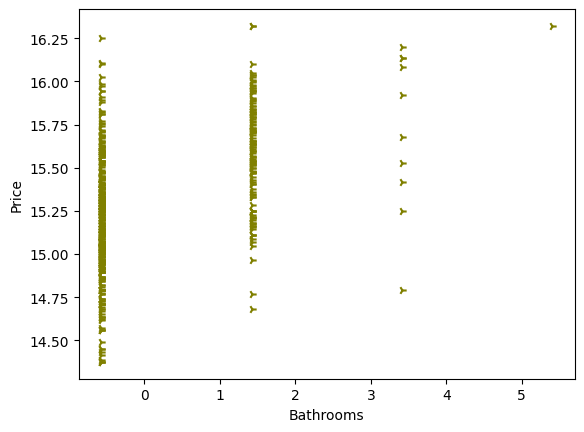

In [371]:
#visualizing the data:bathrooms vs price
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.scatter(df.bathrooms,df.price,color='olive',marker='4' )

(array([ 6.,  3.,  3.,  3.,  9., 11., 16., 18., 21., 28., 45., 33., 33.,
        41., 42., 35., 30., 26., 25., 24., 24., 12., 15., 10., 13.,  7.,
         4.,  2.,  2.,  3.]),
 array([14.37512692, 14.43999057, 14.50485423, 14.56971788, 14.63458154,
        14.69944519, 14.76430885, 14.8291725 , 14.89403616, 14.95889982,
        15.02376347, 15.08862713, 15.15349078, 15.21835444, 15.28321809,
        15.34808175, 15.4129454 , 15.47780906, 15.54267271, 15.60753637,
        15.67240002, 15.73726368, 15.80212733, 15.86699099, 15.93185464,
        15.9967183 , 16.06158196, 16.12644561, 16.19130927, 16.25617292,
        16.32103658]),
 <BarContainer object of 30 artists>)

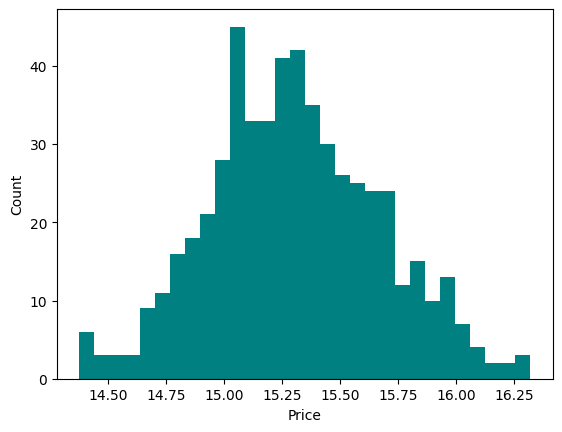

In [372]:
#visualizing the data:price distribution
plt.xlabel('Price')
plt.ylabel('Count')
plt.hist(df.price,color='teal',bins=30)

In [373]:
#correlation matrix
corr_matrix=df.corr()
corr_matrix['price'].sort_values(ascending=False)


price               1.000000
area                0.542453
bathrooms           0.482773
airconditioning     0.451696
stories             0.411829
parking             0.367129
bedrooms            0.365974
prefarea            0.334452
furnishingstatus    0.334309
mainroad            0.330544
guestroom           0.281886
basement            0.224292
hotwaterheating     0.090890
Name: price, dtype: float64

Text(0.5, 1.0, 'Box plot of price')

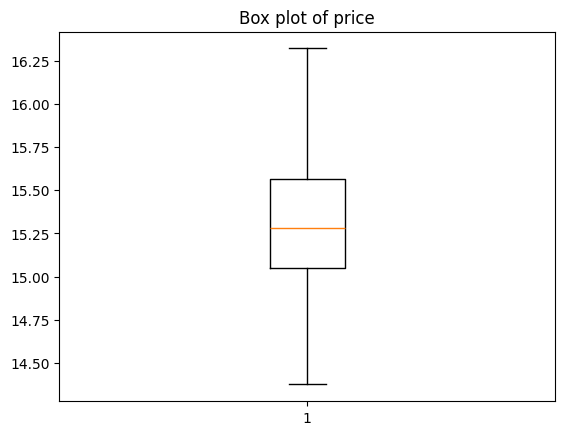

In [374]:
#visualizing the data:outliers in price column
plt.boxplot(df.price)
plt.title('Box plot of price')


In [375]:
#Split data into X and Y
X=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
Y=df[['price']]

In [376]:
#split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [377]:
#Train the model
model=LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [380]:
new_house = [[3000, 3, 3, 2, 1, 1, 0, 1, 2, 1, 2]]  

# Create DataFrame
new_df = pd.DataFrame(new_house, columns=X.columns)

# Scale numeric features using the same scaler used for training
numeric_features = ['area','bedrooms','bathrooms','stories','parking']
new_df[numeric_features] = scaler.transform(new_df[numeric_features])

# Predict log-transformed price
predicted_log_price = model.predict(new_df)

# Inverse log-transform to get original price in INR
predicted_price_inr = np.expm1(predicted_log_price).flatten()  # flatten to 1D array

# Convert INR to lakhs
predicted_price_lakhs = predicted_price_inr[0] / 1e5

# Print predicted price in lakhs
print(f'Predicted House Price: {predicted_price_lakhs:.2f} lakhs')

Predicted House Price: 88.14 lakhs


In [ ]:
#Evaluate the model
Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f'Root Mean Squared Error: {rmse:.2f} lakhs')
print(f'R2 Score: {r2:.2f}')

Root Mean Squared Error: 0.22 lakhs
R2 Score: 0.72
